In [2]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import os, h5py
from chainconsumer import ChainConsumer
from funcs import *
import seaborn as sns
from sklearn.decomposition import PCA

In [3]:
train_set=pd.read_csv("Dataset/quijotelike/fastpm/L1000-N128/zhalos.csv")[:3000]
val_set=pd.read_csv("Dataset/quijotelike/fastpm/L1000-N128/halos.csv")[3000:3600]
test_set=pd.read_csv("Dataset/quijotelike/fastpm/L1000-N128/zhalos.csv")[3600:]
fid_set=pd.read_csv("Dataset/quijotelike-fid/fastpm/L1000-N128/zhalos.csv")
quijote_set=pd.read_csv("Dataset/quijote/nbody/L1000-N128/zhalos.csv")

params_set=["Omega_m", "Omega_b", "h", "n_s", "sigma_8"]
params=params_set[:]

In [4]:
def process_data(data):

    s0=np.array([h5py.File(i)['zS0'][()].astype(np.float64).flatten() for i in data['Filename']])
    s12=np.array([h5py.File(i)['zS12'][()].astype(np.float64).flatten() for i in data['Filename']])
    
    # s0=np.array([np.load(i).astype(np.float64).flatten() for i in data['S0']])
    # s12=np.array([np.load(i).astype(np.float64).flatten() for i in data['S12']])
    
    x=np.concatenate([s0,s12],1)
    x=np.log(x)
    theta=data[params].values
    
    return x, theta

In [5]:
train_x, train_theta=process_data(data=train_set)
val_x, val_theta=process_data(data=val_set)
test_x, test_theta=process_data(data=test_set)
fid_x, fid_theta=process_data(data=fid_set)
quijote_x, quijote_theta=process_data(data=quijote_set)

In [ ]:
J=6
integral_powers = [0.5, 1.0, 2.0,3.0,4.0]
figure, axis = plt.subplots(J+1, 5, figsize=(35,40))

for q in range(5):
    for j in range(J+1):
        s1=np.array([(h5py.File(i)['zS12'][()][j,:,q]).flatten() for i in fid_set['Filename']])
        k=s1  # for s1[:,:,0] no var close to zero
        summary=(k/np.sqrt(k.var(0)))
        corr=np.corrcoef(summary.T)

        axis[j,q].set_title("J={}, q={}".format(j,integral_powers[q]))
        axis[j,q].set_xlabel("l")
        axis[j,q].set_ylabel("l")
        sns.heatmap(corr, ax=axis[j,q])

In [14]:
h5py.File(fid_set['Filename'][0])['zS12'][()][6,:,0], h5py.File(fid_set['Filename'][10])['zS12'][()][6,:,0]

(array([1482910.2  ,   17898.879,   21886.41 ,   28122.709,   32115.887,
          36097.305,   38210.445], dtype=float32),
 array([1482910.5  ,   26589.299,   33280.652,   41768.484,   47820.293,
          53578.64 ,   56864.25 ], dtype=float32))

In [9]:
x=train_x
# Remove Redundancy
std = x.std(axis=0)
x = x[:,np.where(std>2e-02)[0]]

<Axes: >

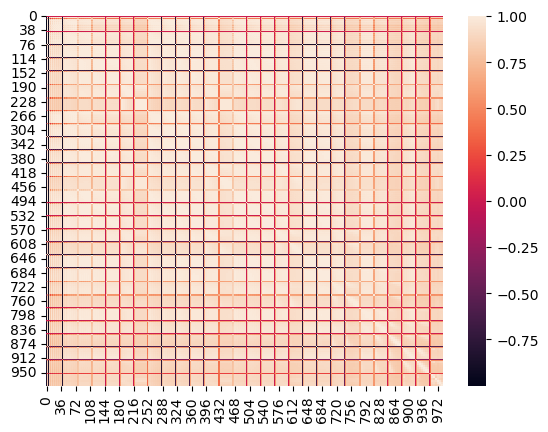

In [6]:
corr = np.corrcoef(train_x.T)
sns.heatmap(corr)

<Axes: >

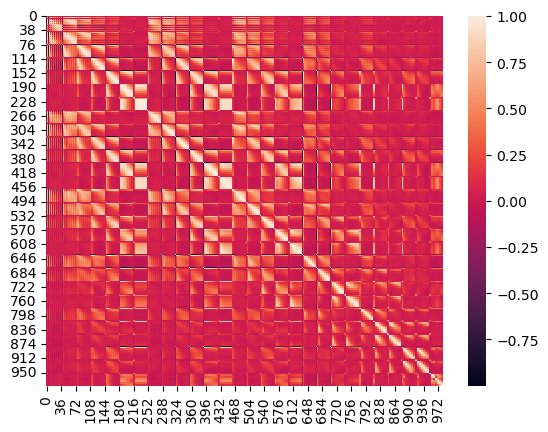

In [7]:
corr = np.corrcoef(fid_x.T)
sns.heatmap(corr)

In [14]:
pca = PCA(n_components=100)
X_train = pca.fit_transform(train_x)
X_fid = pca.transform(fid_x)

<Axes: >

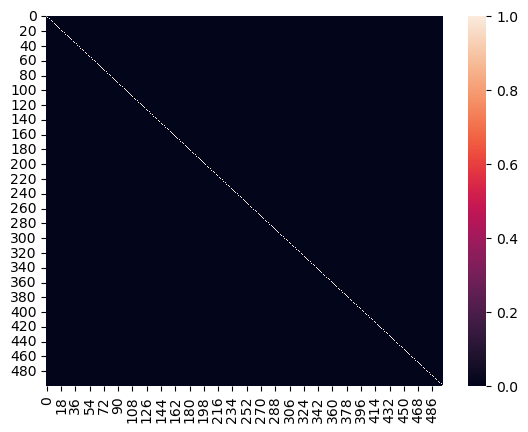

In [10]:
corr = np.corrcoef(X_train.T)
sns.heatmap(corr)

<Axes: >

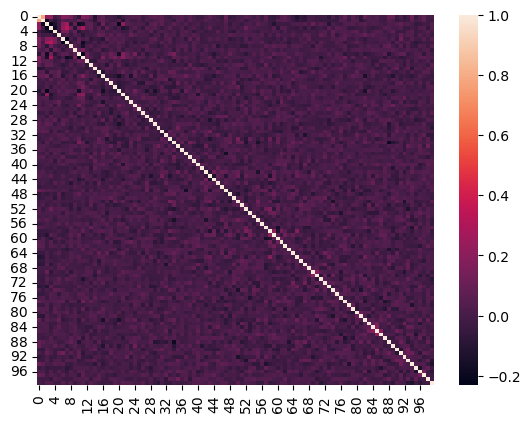

In [15]:
corr = np.corrcoef(X_fid.T)
sns.heatmap(corr)

In [37]:
std=train_x.std(axis=0)
len(np.where(std<2e-02)[0])

98

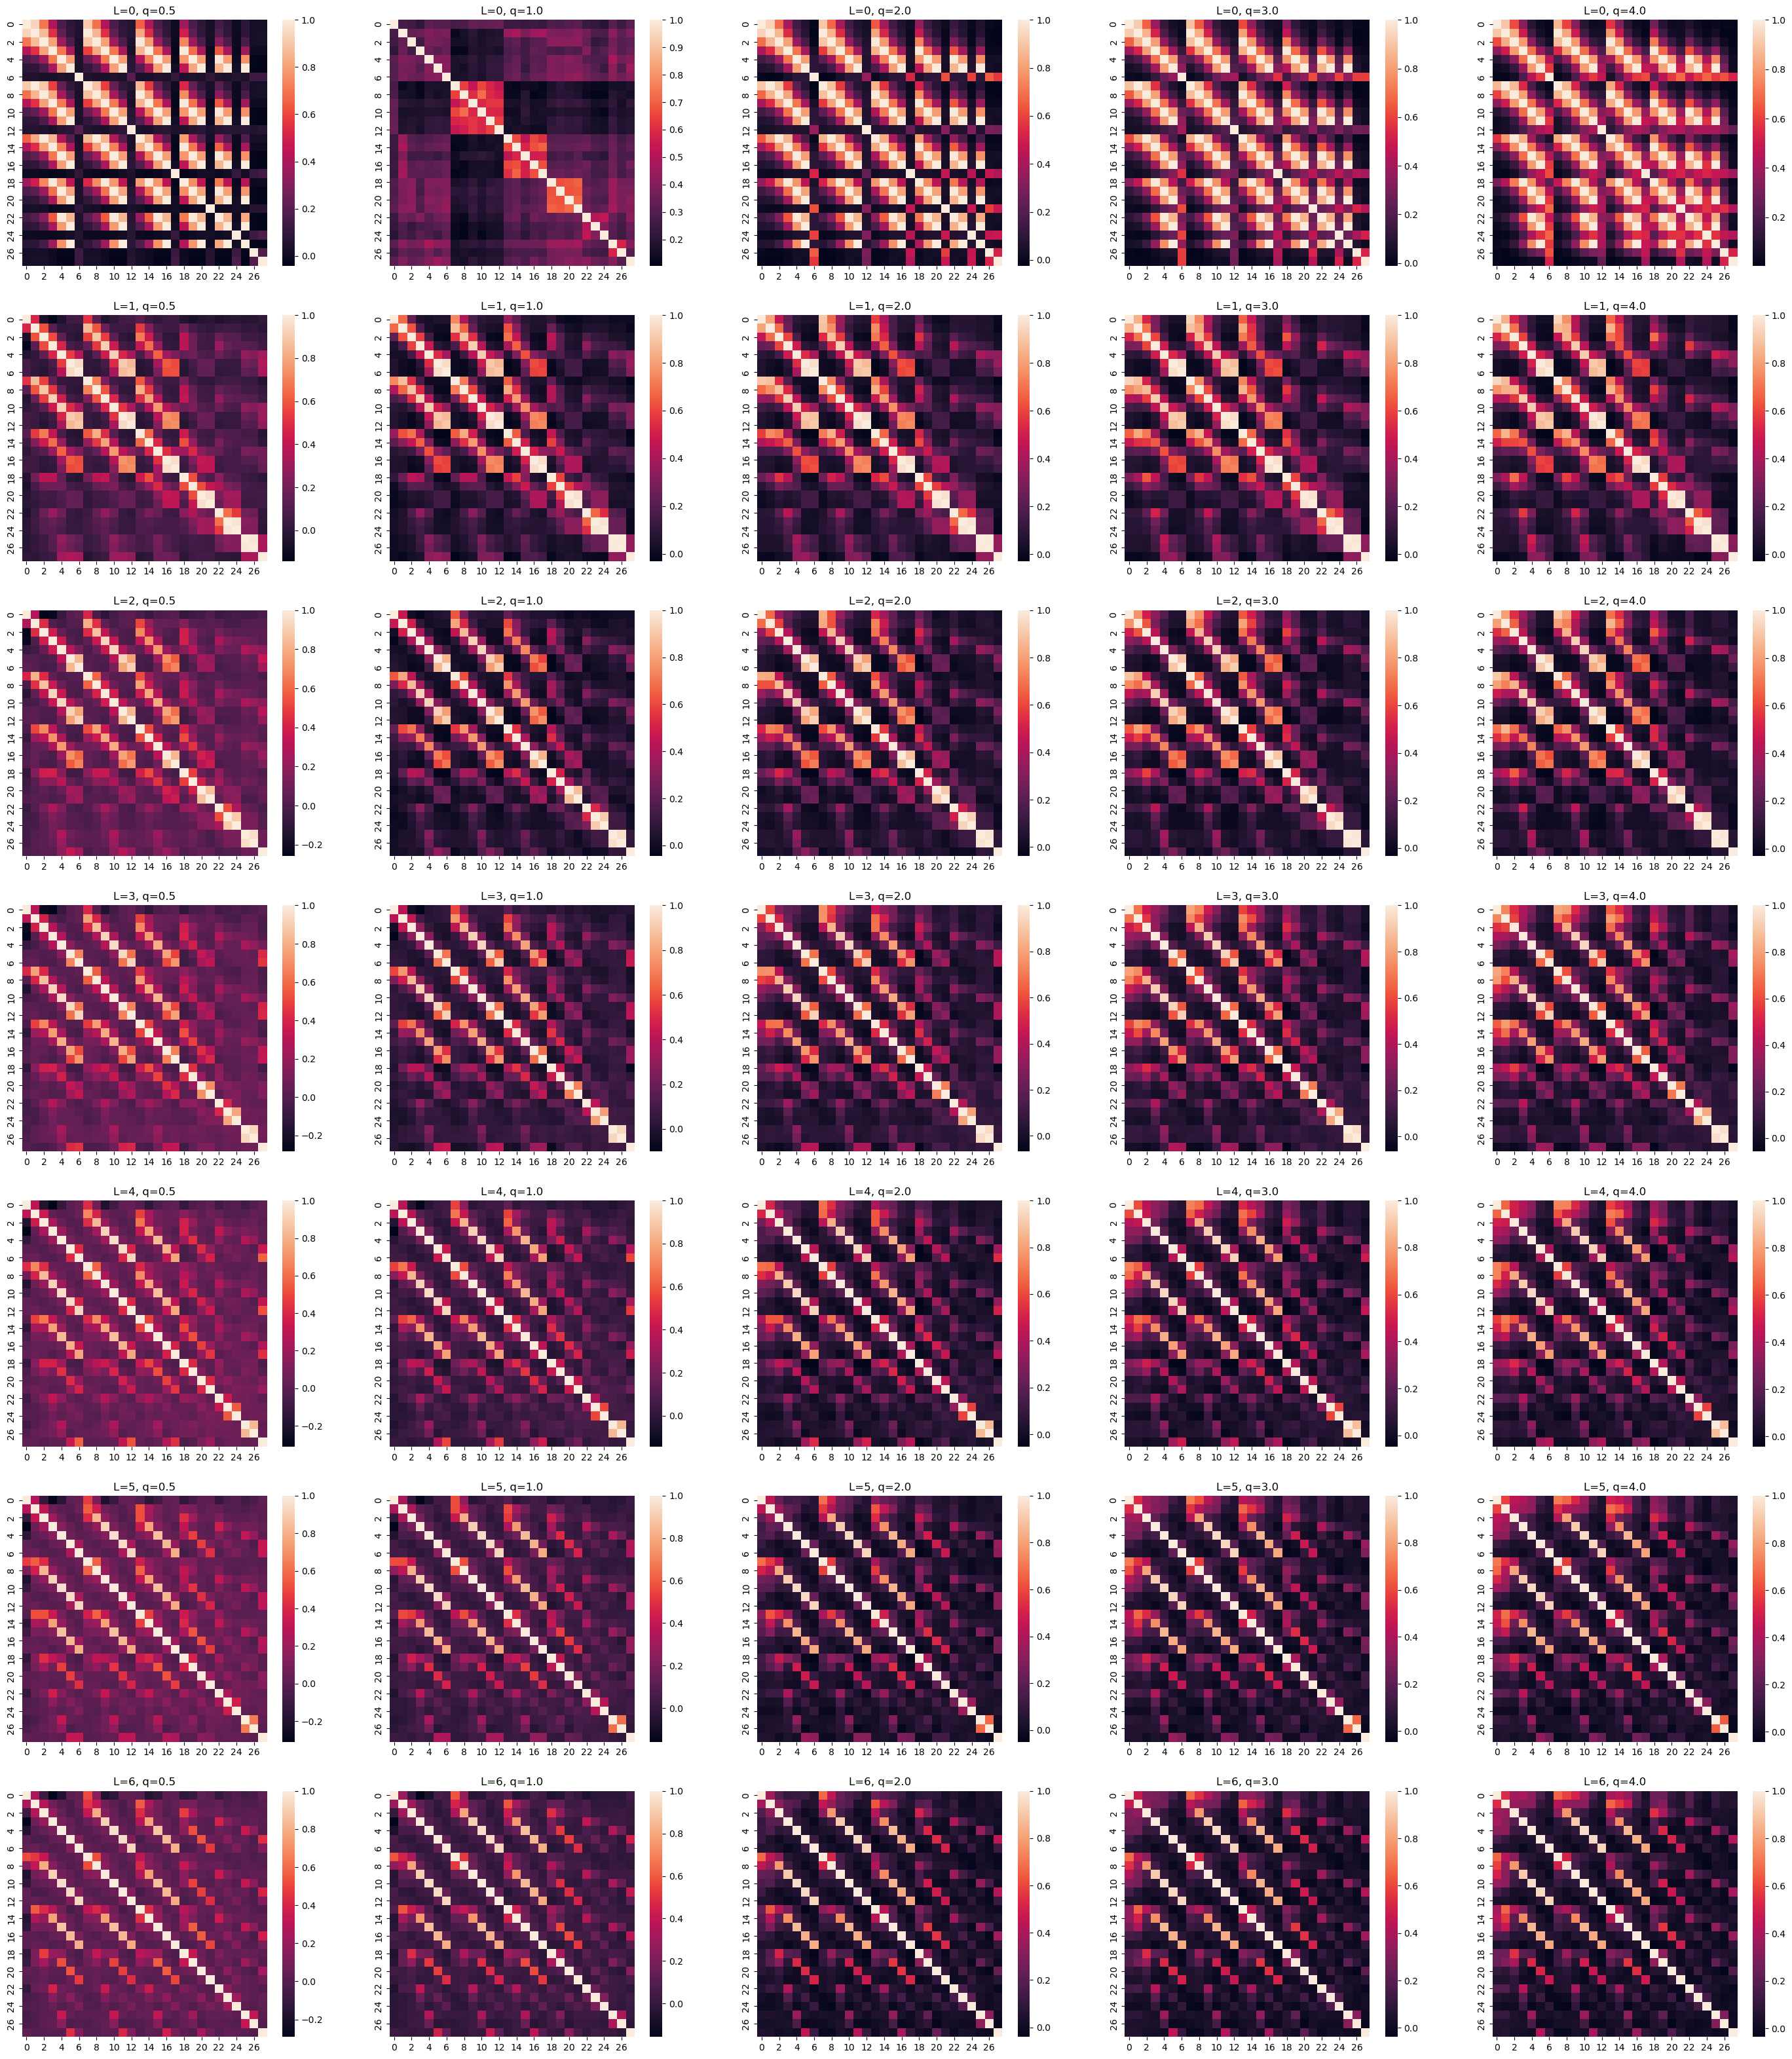

In [12]:
L=6
integral_powers = [0.5, 1.0, 2.0,3.0,4.0]
figure, axis = plt.subplots(L+1, 5, figsize=(35,40))

for q in range(5):
    for l in range(L+1):
        s1=np.array([(h5py.File(i)['zS12'][()][:,l,q]).flatten() for i in fid_set['Filename']])
        k=s1  # for s1[:,:,0] no var close to zero
        summary=(k/np.sqrt(k.var(0)))
        corr=np.corrcoef(summary.T)

        axis[l,q].set_title("L={}, q={}".format(l,integral_powers[q]))
        axis[l,q].set_xlabel("l")
        axis[l,q].set_ylabel("l")
        sns.heatmap(corr, ax=axis[l,q])